# Big Mart Sales

## Importing and reading training dataset

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
tr1= pd.read_csv("C:\\Users\\HP\\Downloads\\train_big.csv")
#tr1.drop("Item_Identifier",axis=1,inplace=True)
#tr1.drop("Outlet_Identifier",axis=1,inplace=True)
tr1.drop("Outlet_Establishment_Year",axis=1,inplace=True)
corrmat=tr1.corr()
#print(tr1.head())
nan_n=pd.isnull(tr1).sum()
print(nan_n)

Item_Identifier            0
Item_Weight             1463
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
dtype: int64


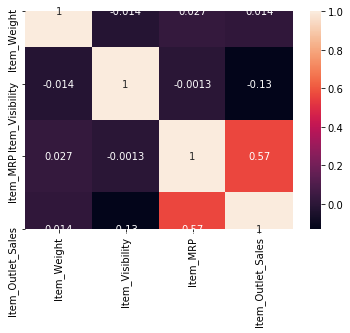

In [44]:
sns.heatmap(tr1.corr(),annot=True)

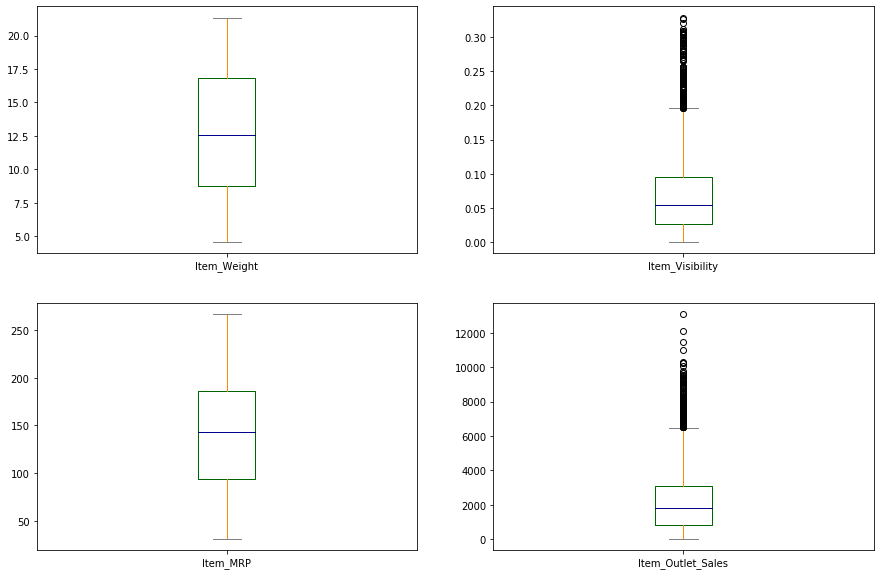

In [45]:
#Checking Outliers
import matplotlib.pyplot as plt
color=dict(boxes='DarkGreen',whiskers='DarkOrange',medians='DarkBlue',caps='Gray')
tr1.plot(kind="box",subplots=True, layout=(2,2), figsize=(15,10),color=color)
plt.show()

In [46]:
#tr1_c=tr1.loc[:,['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Identifier','Outlet_Identifier']]
#tr1_c.head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Identifier,Outlet_Identifier
0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1,FDA15,OUT049
1,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2,DRC01,OUT018
2,Low Fat,Meat,Medium,Tier 1,Supermarket Type1,FDN15,OUT049
3,Regular,Fruits and Vegetables,NaN,Tier 3,Grocery Store,FDX07,OUT010
4,Low Fat,Household,High,Tier 3,Supermarket Type1,NCD19,OUT013


In [88]:
#Filling outlet size by medium
tr1['Outlet_Size'].fillna('Medium',inplace=True)
print(tr1['Outlet_Size'].value_counts())
tr1.head()

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052


In [49]:
#separating numerical values
#tr1_n=tr1.loc[:,['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']]
#print(tr1_n.head())

   Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales
0         9.30         0.016047  249.8092          3735.1380
1         5.92         0.019278   48.2692           443.4228
2        17.50         0.016760  141.6180          2097.2700
3        19.20         0.000000  182.0950           732.3800
4         8.93         0.000000   53.8614           994.7052


In [89]:
nan_n=pd.Series(['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales'])
nan_n=pd.isnull(tr1_n).sum()
print(nan_n[nan_n>0])

Series([], dtype: int64)


In [51]:
#Filling weight by mean
mean=tr1["Item_Weight"].mean()
mean

12.857645184136183

In [90]:
tr1["Item_Weight"].fillna(mean,inplace=True)
tr1["Item_Weight"].head()

0     9.30
1     5.92
2    17.50
3    19.20
4     8.93
Name: Item_Weight, dtype: float64

In [91]:
#Coding char var
from sklearn import preprocessing


l=['Item_Fat_Content','Outlet_Size','Item_Type','Outlet_Location_Type','Outlet_Type','Item_Identifier','Outlet_Identifier']
for i in l:
    label_encoder=preprocessing.LabelEncoder()
    
    label_encoder.fit(tr1[i])
    print(i,label_encoder.classes_)
    
    tr1[i]=label_encoder.transform(tr1[i])
    
tr1.head()

Item_Fat_Content ['LF' 'Low Fat' 'Regular' 'low fat' 'reg']
Outlet_Size ['High' 'Medium' 'Small']
Item_Type ['Baking Goods' 'Breads' 'Breakfast' 'Canned' 'Dairy' 'Frozen Foods'
 'Fruits and Vegetables' 'Hard Drinks' 'Health and Hygiene' 'Household'
 'Meat' 'Others' 'Seafood' 'Snack Foods' 'Soft Drinks' 'Starchy Foods']
Outlet_Location_Type ['Tier 1' 'Tier 2' 'Tier 3']
Outlet_Type ['Grocery Store' 'Supermarket Type1' 'Supermarket Type2'
 'Supermarket Type3']
Item_Identifier ['DRA12' 'DRA24' 'DRA59' ... 'NCZ42' 'NCZ53' 'NCZ54']
Outlet_Identifier ['OUT010' 'OUT013' 'OUT017' 'OUT018' 'OUT019' 'OUT027' 'OUT035' 'OUT045'
 'OUT046' 'OUT049']


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,0,2,1,994.7052


In [55]:
#Concating var
#tr1_1=pd.concat([tr1_n,tr1_c],axis=1)
#print(tr1_1.columns)
#print(tr1_1)

      Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales  \
0           9.300         0.016047  249.8092          3735.1380   
1           5.920         0.019278   48.2692           443.4228   
2          17.500         0.016760  141.6180          2097.2700   
3          19.200         0.000000  182.0950           732.3800   
4           8.930         0.000000   53.8614           994.7052   
...           ...              ...       ...                ...   
8518        6.865         0.056783  214.5218          2778.3834   
8519        8.380         0.046982  108.1570           549.2850   
8520       10.600         0.035186   85.1224          1193.1136   
8521        7.210         0.145221  103.1332          1845.5976   
8522       14.800         0.044878   75.4670           765.6700   

      Item_Fat_Content  Item_Type  Outlet_Size  Outlet_Location_Type  \
0                    1          4            1                     0   
1                    2         14            1     

In [92]:
x_tr=tr1[['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size', 'Outlet_Location_Type','Outlet_Type','Item_Identifier','Outlet_Identifier']]
y_tr=tr1[['Item_Outlet_Sales']]
x_tr.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Identifier,Outlet_Identifier
0,9.30,1,0.016047,4,249.8092,1,0,1,156,9
1,5.92,2,0.019278,14,48.2692,1,2,2,8,3
2,17.50,1,0.016760,10,141.6180,1,0,1,662,9
3,19.20,2,0.000000,6,182.0950,1,2,0,1121,0
4,8.93,1,0.000000,9,53.8614,0,2,1,1297,1


In [93]:
# Creating decision tree classifier object
from sklearn.tree import DecisionTreeRegressor
clf=DecisionTreeRegressor( max_depth=3)
clf

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [94]:
#train decision tree classifier
clf=clf.fit(x_tr, y_tr)
clf

DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

## Importing testing dataset

In [96]:
import pandas as pd
import numpy as np
import seaborn as sns
tst= pd.read_csv("C:\\Users\\HP\\Downloads\\test_big.csv")
#tst.drop("Item_Identifier",axis=1,inplace=True)
#tst.drop("Outlet_Identifier",axis=1,inplace=True)
tst.drop("Outlet_Establishment_Year",axis=1,inplace=True)
corrmat=tst.corr()
print(tst.head())
nan_n=pd.isnull(tst).sum()


  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  \
0           FDW58       20.750          Low Fat         0.007565  Snack Foods   
1           FDW14        8.300              reg         0.038428        Dairy   
2           NCN55       14.600          Low Fat         0.099575       Others   
3           FDQ58        7.315          Low Fat         0.015388  Snack Foods   
4           FDY38          NaN          Regular         0.118599        Dairy   

   Item_MRP Outlet_Identifier Outlet_Size Outlet_Location_Type  \
0  107.8622            OUT049      Medium               Tier 1   
1   87.3198            OUT017         NaN               Tier 2   
2  241.7538            OUT010         NaN               Tier 3   
3  155.0340            OUT017         NaN               Tier 2   
4  234.2300            OUT027      Medium               Tier 3   

         Outlet_Type  
0  Supermarket Type1  
1  Supermarket Type1  
2      Grocery Store  
3  Supermarket Type1  
4

In [69]:
#tst_c=tr1.loc[:,['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Identifier','Outlet_Identifier']]
#tst_c.head()

,Item_Fat_Content,Item_Type,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Identifier,Outlet_Identifier
0,Low Fat,Dairy,Medium,Tier 1,Supermarket Type1,FDA15,OUT049
1,Regular,Soft Drinks,Medium,Tier 3,Supermarket Type2,DRC01,OUT018
2,Low Fat,Meat,Medium,Tier 1,Supermarket Type1,FDN15,OUT049
3,Regular,Fruits and Vegetables,NaN,Tier 3,Grocery Store,FDX07,OUT010
4,Low Fat,Household,High,Tier 3,Supermarket Type1,NCD19,OUT013


In [97]:
#Filling outlet size by medium
tst['Outlet_Size'].fillna('Medium',inplace=True)
print(tst['Outlet_Size'].value_counts())
tst.head()

Medium    3468
Small     1592
High       621
Name: Outlet_Size, dtype: int64


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,Medium,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,Medium,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,Medium,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3


In [71]:
#separating numerical values
#tst_n=tr1.loc[:,['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales']]
#print(tst_n.head())

   Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales
0         9.30         0.016047  249.8092          3735.1380
1         5.92         0.019278   48.2692           443.4228
2        17.50         0.016760  141.6180          2097.2700
3        19.20         0.000000  182.0950           732.3800
4         8.93         0.000000   53.8614           994.7052


In [98]:
nan_n=pd.Series(['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales'])
nan_n=pd.isnull(tst).sum()
print(nan_n[nan_n>0])

Item_Weight    976
dtype: int64


In [99]:
#Filling weight by mean
mean=tst["Item_Weight"].mean()
mean

12.695633368756374

In [100]:
tst["Item_Weight"].fillna(mean,inplace=True)
tst["Item_Weight"].head()

0    20.750000
1     8.300000
2    14.600000
3     7.315000
4    12.695633
Name: Item_Weight, dtype: float64

In [101]:
#Coding char var
from sklearn import preprocessing


l=['Item_Fat_Content','Outlet_Size','Item_Type','Outlet_Location_Type','Outlet_Type','Item_Identifier','Outlet_Identifier']
for i in l:
    label_encoder=preprocessing.LabelEncoder()
    
    label_encoder.fit(tst[i])
    print(i,label_encoder.classes_)
    
    tst[i]=label_encoder.transform(tst[i])
    
tst.head()

Item_Fat_Content ['LF' 'Low Fat' 'Regular' 'low fat' 'reg']
Outlet_Size ['High' 'Medium' 'Small']
Item_Type ['Baking Goods' 'Breads' 'Breakfast' 'Canned' 'Dairy' 'Frozen Foods'
 'Fruits and Vegetables' 'Hard Drinks' 'Health and Hygiene' 'Household'
 'Meat' 'Others' 'Seafood' 'Snack Foods' 'Soft Drinks' 'Starchy Foods']
Outlet_Location_Type ['Tier 1' 'Tier 2' 'Tier 3']
Outlet_Type ['Grocery Store' 'Supermarket Type1' 'Supermarket Type2'
 'Supermarket Type3']
Item_Identifier ['DRA12' 'DRA24' 'DRA59' ... 'NCZ42' 'NCZ53' 'NCZ54']
Outlet_Identifier ['OUT010' 'OUT013' 'OUT017' 'OUT018' 'OUT019' 'OUT027' 'OUT035' 'OUT045'
 'OUT046' 'OUT049']


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,1,0.007565,13,107.8622,9,1,0,1
1,1067,8.300000,4,0.038428,4,87.3198,2,1,1,1
2,1406,14.600000,1,0.099575,11,241.7538,0,1,2,0
3,809,7.315000,1,0.015388,13,155.0340,2,1,1,1
4,1184,12.695633,2,0.118599,4,234.2300,5,1,2,3


In [76]:
#Concating var
#tst_1=pd.concat([tst_n,tst_c],axis=1)
#print(tr1_1.columns)
#print(tst_1)

      Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales  \
0           9.300         0.016047  249.8092          3735.1380   
1           5.920         0.019278   48.2692           443.4228   
2          17.500         0.016760  141.6180          2097.2700   
3          19.200         0.000000  182.0950           732.3800   
4           8.930         0.000000   53.8614           994.7052   
...           ...              ...       ...                ...   
8518        6.865         0.056783  214.5218          2778.3834   
8519        8.380         0.046982  108.1570           549.2850   
8520       10.600         0.035186   85.1224          1193.1136   
8521        7.210         0.145221  103.1332          1845.5976   
8522       14.800         0.044878   75.4670           765.6700   

      Item_Fat_Content  Item_Type  Outlet_Size  Outlet_Location_Type  \
0                    1          4            1                     0   
1                    2         14            1     

In [102]:
x_ts=tst[['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Size', 'Outlet_Location_Type','Outlet_Type','Item_Identifier','Outlet_Identifier']]


In [103]:
# predicting model
y_pred=clf.predict(x_ts)
print(y_pred.shape)


(5681,)


## Generating and submitting CSV File:

In [79]:
#tst_1=pd.concat([tst_n,tst_c],axis=1)
#tst_1.to_csv('test_new.csv')


In [104]:
#tst11=pd.read_csv("test_new.csv")
Item_Identifier=tst['Item_Identifier']
Outlet_Identifier=tst['Outlet_Identifier']
#Outlet_Identifier.shape

In [106]:
submission=pd.DataFrame({'Item_Identifier':Item_Identifier,'Outlet_Identifier':Outlet_Identifier,'Item_Outlet_Sales':y_pred})
submission.to_csv("sample_submission33.csv",index=False)